# Gerekli kütüphaneler

In [16]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Veriseti yüklemesi

In [17]:
df = pd.read_csv('data_banknote_authentication.csv', sep=';')

# Veriye ilk bakış

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   object 
 1   skewness  1372 non-null   object 
 2   curtosis  1372 non-null   object 
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 53.7+ KB
None


Veriseti elemanları hakkında genel bilgi. Sütun ismi, sütunda kaç adet veri olduğu ve değişkenin veri tipi.

In [19]:
print(df.shape)

(1372, 5)


Veriseti kaç sütun ve kaç satırdan oluşuyor. 1372 adet satır, 5 adet sütun mevcut.

In [20]:
print(df.head())

  variance skewness curtosis   entropy  class
0   36.216   86.661  -28.073  -0.44699      0
1   45.459   81.674  -24.586 -14.62100      0
2    3.866  -26.383   19.242   0.10645      0
3   34.566   95.228  -40.112 -35.94400      0
4  0.32924  -44.552   45.718  -0.98880      0


Verisetinin ilk 5 satırını gösterir.

In [21]:
print(df.tail())

     variance  skewness curtosis   entropy  class
1367  0.40614    13.492  -14.501  -0.55949      1
1368  -13.887   -48.773   64.774   0.34179      1
1369  -37.503  -134.586  175.932 -27.77100      1
1370  -35.637   -83.827   12.393 -12.82300      1
1371  -25.419  -0.65804   26.842  11.95200      1


Verisetinin son 5 satırını gösterir.

In [22]:
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'y']

for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

Object olarak gözüken değişkenleri sayısal ifadeye çeviriyoruz. (İleride daha kolay işlem yapabilmek için)

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1369 non-null   float64
 1   skewness  1360 non-null   float64
 2   curtosis  1365 non-null   float64
 3   entropy   1372 non-null   float64
 4   y         1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


Sayısal ifadeye çevirdiğimiz değişkenleri kontrol ediyoruz. Dönüştürme işlemi başarılı bir şekilde gerçekleşmiş.

# 2. Veri Setinin Betimlenmesi

In [24]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
variance,1369.0,3.837445,26.879868,-70.421,-15.8510,0.48797,25.58100,68.248
skewness,1360.0,17.494898,56.002524,-137.731,-6.6755,15.14700,61.71075,129.516
curtosis,1365.0,12.339244,41.143078,-52.861,-13.7210,0.57722,27.74200,179.274
entropy,1372.0,-11.475199,20.218128,-85.482,-21.9780,-0.58665,0.39481,24.495
y,1372.0,0.444606,0.497103,0.000,0.0000,0.00000,1.00000,1.000


Eksik gözlemleri göz ardı eder ve verisetindeki değerlerin temel istatistiksel özellikleri analiz eder. 

# 3. Eksik Değerlerin İncelenmesi

In [25]:
df.isnull().values.any()

np.True_

Eksik veri var mı ? Şu an eksik veri var. Çünkü "False" değeri bize geri döndü

In [26]:
df.isnull().sum()

variance     3
skewness    12
curtosis     7
entropy      0
y            0
dtype: int64

Hangi değişkende kaç tane eksik veri var?

In [27]:
df = df.dropna() 

Eksik veri sayısının toplam veri sayısına oranı çok küçük olduğu için eksik veri bulunan satırların silinmesi tercih edildi.

In [28]:
df.isnull().values.any() # temizlik sonrası eksik veri var mı

np.False_

Silme işlemi sonrasında tekrar eksik veri kontrolü yapıldı.

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1350.0,3.767649,26.901019,-70.364,-15.9325,0.417220,25.545000,68.248
skewness,1350.0,17.726523,55.989011,-137.731,-6.5720,15.799000,61.944000,129.516
curtosis,1350.0,12.489055,41.173270,-52.861,-13.6590,0.615345,27.805750,179.274
entropy,1350.0,-11.507259,20.179100,-85.482,-21.9780,-0.588590,0.394487,21.625
y,1350.0,0.448148,0.497488,0.000,0.0000,0.000000,1.000000,1.000


Silme işlemi sonrasında tekrar değişkenlerin temel istatistiksel özellikleri analiz edildi.

# Veri görselleştirme

<Axes: xlabel='y', ylabel='count'>

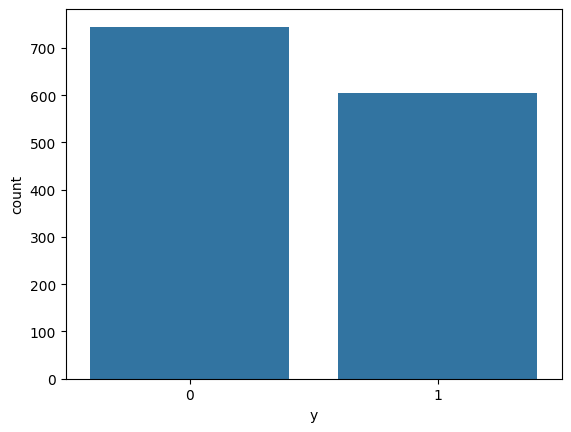

In [32]:
sns.countplot(x='y', data=df)

Bu grafik, sahte ve gerçek banknot sayılarının birbirine yakın olduğunu gösteriyor. Böylelikle dengeli bir model üretebileceğiz. Sahte ve gerçek banknot sayıları birbirine yakın olmasıydı eğiteceğimiz model çoğunluğun olduğu kısma yanlı olacaktı.

<Axes: xlabel='y', ylabel='variance'>

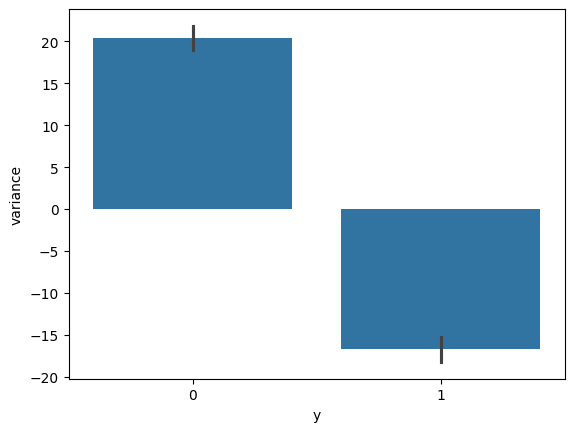

In [36]:
sns.barplot(x='y', y='variance', data=df)


Bu grafik variance değişkeni ile sonuç(y) değişkeni arasındaki ilişkiyi ifade etmemizi sağlıyor. Grafiğe baktığımız zaman variance değeri pozitif olanların sahte, variance değeri negatif olanların gerçek banknot olduğunu rahat bir şekilde görebiliyoruz. Modelimizin daha doğru sonuçlar üretmesi için diğer değişkenleri de kontrol edeceğiz.

<Axes: xlabel='y', ylabel='skewness'>

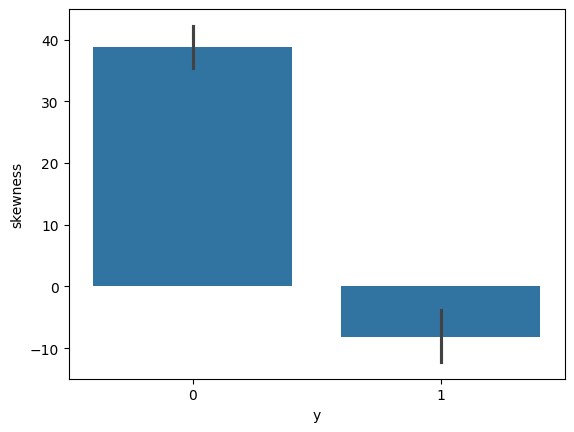

In [37]:
sns.barplot(x='y', y='skewness', data=df)

Bu grafik skewness değişkeni ile sonuç(y) değişkeni arasındaki ilişkiyi ifade etmemizi sağlıyor. Bu grafikte de bir önceki variance grafiğindeki gibi benzer bir durumu görmekteyiz. 

<Axes: xlabel='y', ylabel='entropy'>

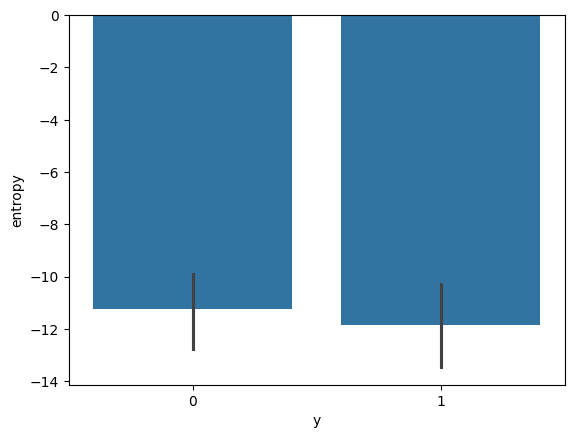

In [38]:
sns.barplot(x='y', y='entropy', data=df)

Bu grafik entropy değişkeni ile sonuç(y) değişkeni arasındaki ilişki ifade etmeizi sağlıyor. Grafiği incelediğimiz zaman entropy değişkeninin değeri hem sahte hem de gerçek banknotlar için nerdeyse aynıdır. Bu yüzden sadece bu grafiği bakarak bir sonuç elde edemeyiz.

<Axes: xlabel='y', ylabel='curtosis'>

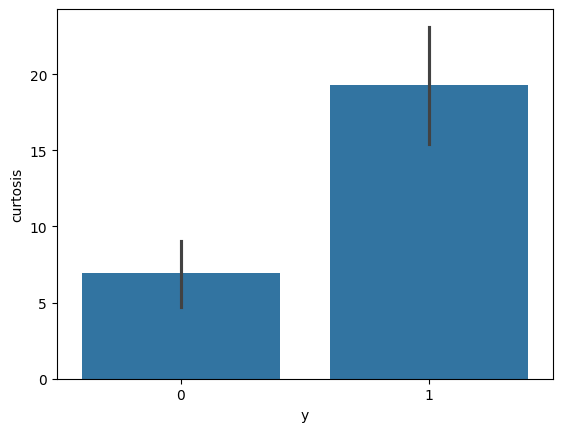

In [39]:
sns.barplot(x='y', y='curtosis', data=df)

Bu grafik curtosis değişkeni ile sonuç(y) değişkeni arasındaki ilişkiyi ifade etmemizi sağlar. Grafiği incelediğiz zaman düşük curtosis değerinde bir çıkarım yapmak mümkün değildir. Çünkü curtosis değeri hem sahte hem de gerçek banknotlar için düşük olabilir. Ancak belli bir değerden yüksek curtosis değeri için gerçek banknot için geçerli olduğunu söyleyebiliriz. 

<Axes: xlabel='y', ylabel='variance'>

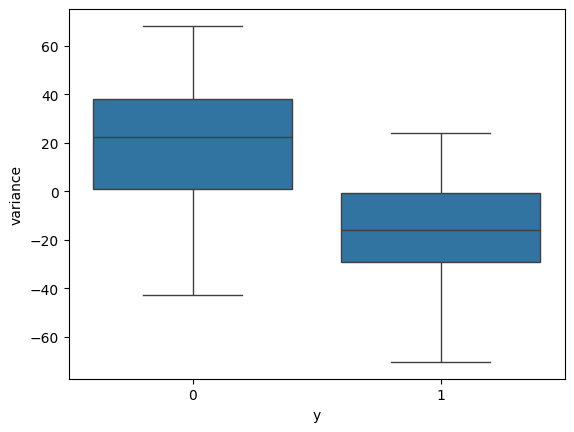

In [43]:
sns.boxplot(x='y', y='variance', data=df)


<Axes: xlabel='y', ylabel='skewness'>

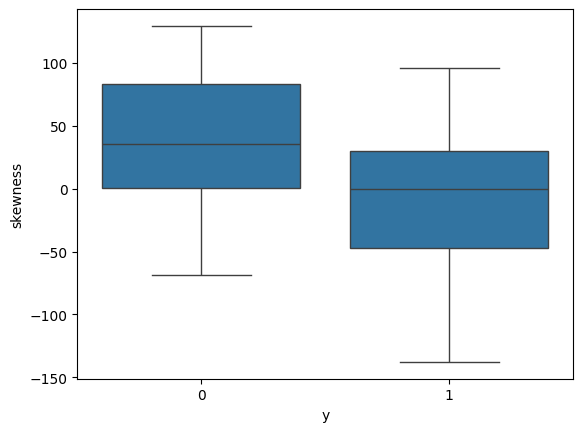

In [47]:
sns.boxplot(x='y', y='skewness', data=df)

<Axes: xlabel='y', ylabel='entropy'>

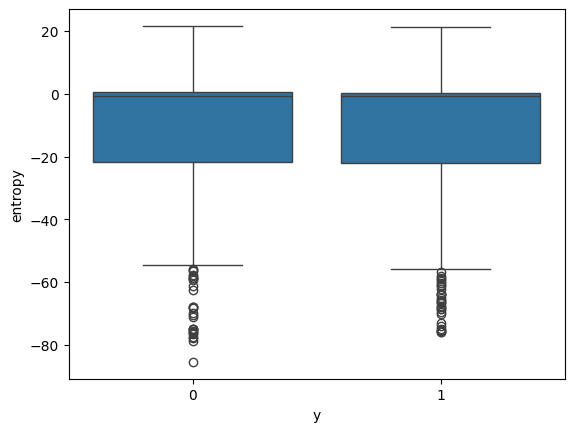

In [48]:
sns.boxplot(x='y', y='entropy', data=df)

<Axes: xlabel='y', ylabel='curtosis'>

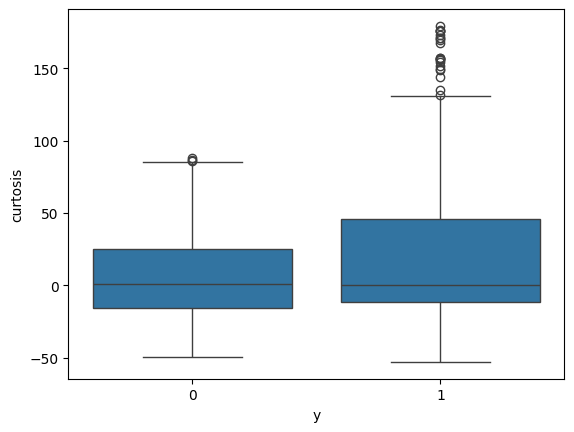

In [49]:
sns.boxplot(x='y', y='curtosis', data=df)

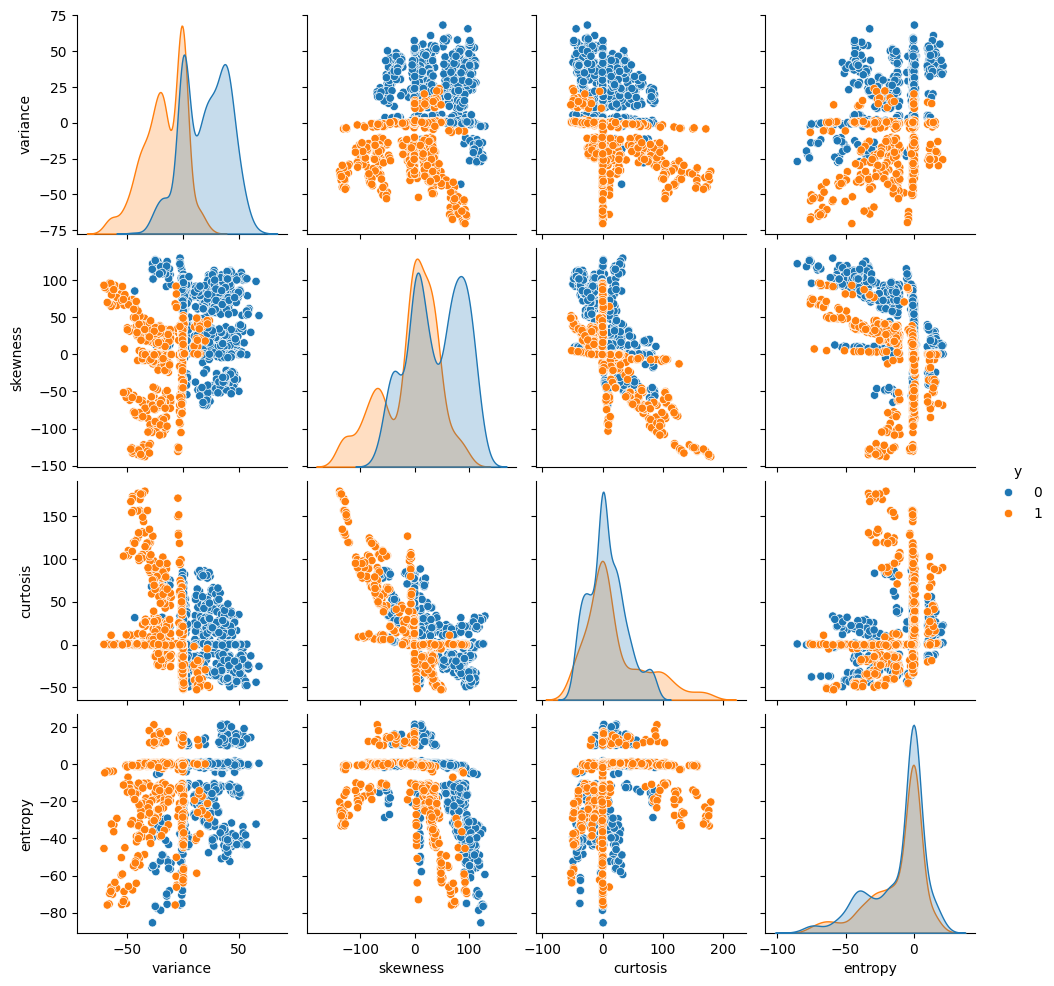

In [44]:
sns.pairplot(df, hue='y')

<Axes: >

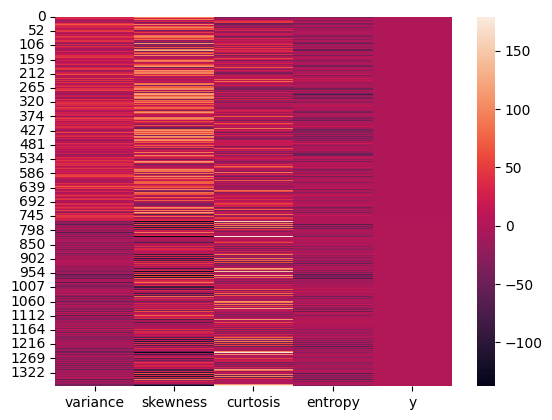

In [56]:
sns.heatmap(df)

# 5. Hipotez testleri